In [55]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

from matplotlib import style

In [56]:
mergedTrialData_df = pd.read_csv("mergedTrialData.csv")
demographics_df = pd.read_csv("demographic.csv")

In [57]:
Participant_df = mergedTrialData_df.merge(demographics_df, on='subject').rename(columns={' group': 'group'})
Participant_df.head()

,subject,trial,condition,ITI,rejected,Fz_N100,FCz_N100,Cz_N100,FC3_N100,FC4_N100,...,FC3_B1,FC4_B1,C3_B1,C4_B1,CP3_B1,CP4_B1,group,gender,age,education
0,1,1,1,NaN,0,-9.761338,-11.545219,-16.775214,-3.576595,-11.745167,...,-13.285282,-23.223037,-23.622596,-19.071931,-19.529142,-26.677147,0,M,44,16.0
1,1,2,1,2025.3906,0,8.717519,11.462619,7.979110,9.429738,6.912862,...,13.442292,16.981404,11.953868,10.168470,5.831319,6.503993,0,M,44,16.0
2,1,3,1,2303.7109,0,-4.027286,-3.992038,-1.104119,-3.319471,0.321314,...,1.199502,0.929950,1.343815,3.131847,3.691148,0.338882,0,M,44,16.0
3,1,4,1,2275.3906,0,0.394095,-0.663186,-1.372871,3.974643,-1.613667,...,5.336565,-0.448384,7.983687,6.579145,8.474662,9.381523,0,M,44,16.0
4,1,5,1,2464.8438,0,-9.368090,-12.029829,-10.280100,-7.846471,-8.170986,...,0.212776,-5.815893,2.517058,-1.101036,-4.325141,-4.832745,0,M,44,16.0


In [58]:
from sklearn.linear_model import LinearRegression
import pandas as pd

In [68]:
mergedTrialData_averaged_df = mergedTrialData_df.groupby('subject').mean()

In [60]:
mergedTrialData_averaged_df.head()

,trial,condition,ITI,rejected,Fz_N100,FCz_N100,Cz_N100,FC3_N100,FC4_N100,C3_N100,...,CP4_B0,Fz_B1,FCz_B1,Cz_B1,FC3_B1,FC4_B1,C3_B1,C4_B1,CP3_B1,CP4_B1
subject,,,,,,,,,,,,,,,,,,,,,
1,50.171141,2.000000,2825.814358,0.030201,-3.758078,-3.709469,-3.430479,-3.159399,-3.759882,-2.807345,...,0.003690,1.009397,1.079239,0.966869,1.770834,0.828906,1.753613,0.670578,1.435104,0.932307
2,50.171141,2.000000,2350.668702,0.000000,-2.477591,-2.633028,-2.263567,-1.902506,-1.888696,-1.591404,...,0.004962,0.163258,0.268071,0.054857,0.285030,0.688827,0.346570,-0.044879,-0.074469,0.165761
3,50.171141,2.000000,1794.028080,0.036913,-3.714925,-4.351427,-4.252977,-2.789237,-2.799512,-1.642356,...,-0.002268,1.199195,0.086899,-0.871975,0.661526,1.149944,-0.206321,-0.355422,-1.118638,-0.935494
4,50.003367,2.003367,2227.263372,0.030303,-4.717606,-4.224721,-3.074499,-2.741106,-3.452926,-1.961902,...,-0.006128,2.148370,2.024521,2.103350,2.255097,1.417232,2.326886,1.577574,2.142686,1.302185
5,50.334448,2.000000,2515.888944,0.030100,-3.637179,-3.890643,-3.407677,-3.308248,-3.304539,-2.797433,...,-0.003158,3.764963,3.036094,2.392823,2.975226,2.480377,2.418446,2.309906,1.685082,1.826066


In [61]:
mergedTrialData_averaged_df.merge(demographics_df, on='subject').rename(columns={' group': 'group'})

,subject,trial,condition,ITI,rejected,Fz_N100,FCz_N100,Cz_N100,FC3_N100,FC4_N100,...,FC3_B1,FC4_B1,C3_B1,C4_B1,CP3_B1,CP4_B1,group,gender,age,education
0,1,50.171141,2.000000,2825.814358,0.030201,-3.758078,-3.709469,-3.430479,-3.159399,-3.759882,...,1.770834,0.828906,1.753613,0.670578,1.435104,0.932307,0,M,44,16.0
1,2,50.171141,2.000000,2350.668702,0.000000,-2.477591,-2.633028,-2.263567,-1.902506,-1.888696,...,0.285030,0.688827,0.346570,-0.044879,-0.074469,0.165761,0,M,39,17.0
2,3,50.171141,2.000000,1794.028080,0.036913,-3.714925,-4.351427,-4.252977,-2.789237,-2.799512,...,0.661526,1.149944,-0.206321,-0.355422,-1.118638,-0.935494,0,M,53,18.0
3,4,50.003367,2.003367,2227.263372,0.030303,-4.717606,-4.224721,-3.074499,-2.741106,-3.452926,...,2.255097,1.417232,2.326886,1.577574,2.142686,1.302185,0,M,52,15.0
4,5,50.334448,2.000000,2515.888944,0.030100,-3.637179,-3.890643,-3.407677,-3.308248,-3.304539,...,2.975226,2.480377,2.418446,2.309906,1.685082,1.826066,0,M,41,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,77,50.171141,2.000000,3892.965445,0.067114,-1.166457,-0.952511,-0.151696,-0.352796,-0.860758,...,1.202070,0.488183,0.883494,0.244616,0.590810,-0.216080,1,M,28,13.0
77,78,50.010101,2.000000,3013.303182,0.037037,-3.221408,-2.387152,-2.381237,-1.252020,-3.127319,...,-0.089042,0.422882,-0.175286,0.096642,0.033592,0.024343,1,F,32,16.0
78,79,50.171141,2.000000,2442.892618,0.010067,-4.028807,-4.121220,-3.302542,-2.934670,-3.537007,...,1.374701,0.805522,2.333357,1.721417,1.437692,1.282188,1,M,37,16.0
79,80,50.171141,2.000000,1385.126462,0.053691,-2.361078,-2.142041,-1.667392,-1.908183,-1.453830,...,-0.161741,0.115978,-0.455912,0.037916,-0.876926,-0.366361,1,M,33,13.0


In [62]:
All_mean= mergedTrialData_averaged_df.merge


In [84]:
style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (20,10)

AttributeError: module 'pandas' has no attribute 'mergedTrialData_averaged_df'

In [91]:
sns.pairplot(mergedTrialData_averaged_df.merge)

TypeError: 'data' must be pandas DataFrame object, not: <class 'method'>

In [50]:

X_var= All_mean ('Subject')
y_var= All_mean('Fz_N100')

TypeError: Can only merge Series or DataFrame objects, a <class 'str'> was passed

Text(0.5, 0, 'Subject')

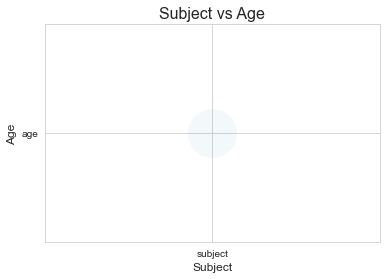

In [36]:
plt.scatter(x = 'subject', y = 'age', data = All_mean, s = 2400, alpha = 0.05, edgecolor = 'white')
plt.title('Subject vs Age', fontsize = 16)
plt.ylabel('Age', fontsize = 12)
plt.xlabel('Subject', fontsize = 12)


Text(0.5, 0, 'Subject')

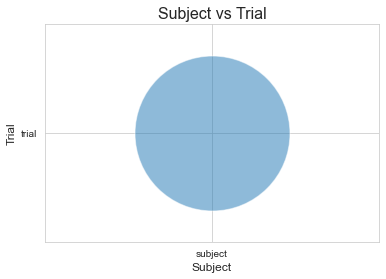

In [37]:
plt.scatter(x = 'subject', y = 'trial', data = mergedTrialData_averaged_df.merge, s = 24000, alpha = 0.5, edgecolor = 'white')
plt.title('Subject vs Trial', fontsize = 16)
plt.ylabel('Trial', fontsize = 12)
plt.xlabel('Subject', fontsize = 12)

In [ ]:
plt.scatter(x = 'subject', y = 'trial', data = All_mean, s = 24000, alpha = 0.5, edgecolor = 'white')
plt.title('Subject vs Trial', fontsize = 16)
plt.ylabel('Trial', fontsize = 12)
plt.xlabel('Subject', fontsize = 12)

Text(0.5, 0, 'Subject')

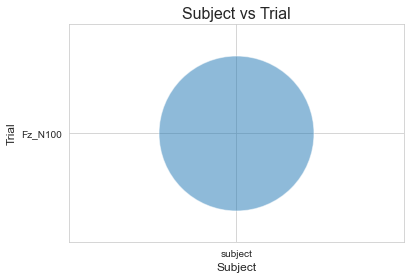

In [38]:
plt.scatter(x = 'subject', y = 'Fz_N100', data = All_mean, s = 24000, alpha = 0.5, edgecolor = 'white')
plt.title('Subject vs Trial', fontsize = 16)
plt.ylabel('Trial', fontsize = 12)
plt.xlabel('Subject', fontsize = 12)

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [79]:
slr = LinearRegression(copy_X = True)

slr.fit(All_mean)
print(slr.coef_)
print(slr.intercept_)

TypeError: fit() missing 1 required positional argument: 'y'

In [81]:

X_train, Xtest, y_train, y_test= train_test_split(X,y)

lr = LinearRegression()
lr.fit(X_train, y_train)
merge= lr.predict(X_train, Xtest, y_train, y_test)

TypeError: predict() takes 2 positional arguments but 5 were given

In [83]:
lr.fit(mergedTrialData_averaged_df.merge)

TypeError: fit() missing 1 required positional argument: 'y'

In [92]:
condition_1_df = mergedTrialData_df[mergedTrialData_df.condition == 1]
condition_1_averaged_df = condition_1_df.groupby('subject').mean()
condition_1_averaged_demo_df = condition_1_averaged_df.merge(demographics_df, on='subject').rename(columns={' group': 'group'})